# Análisis exploratorio - Ejemplo

lorem ipsu sum

## Introducción

lorem ipsu sum

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro, kstest
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


import plotly.express as px
import plotly as plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff



In [2]:
df = pd.read_csv('./data/insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## Medidas de dispersión

lorem ipsu sum

In [3]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [4]:
df.describe(include=object)

sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

## Distribución de variables

lorem ipsu sum

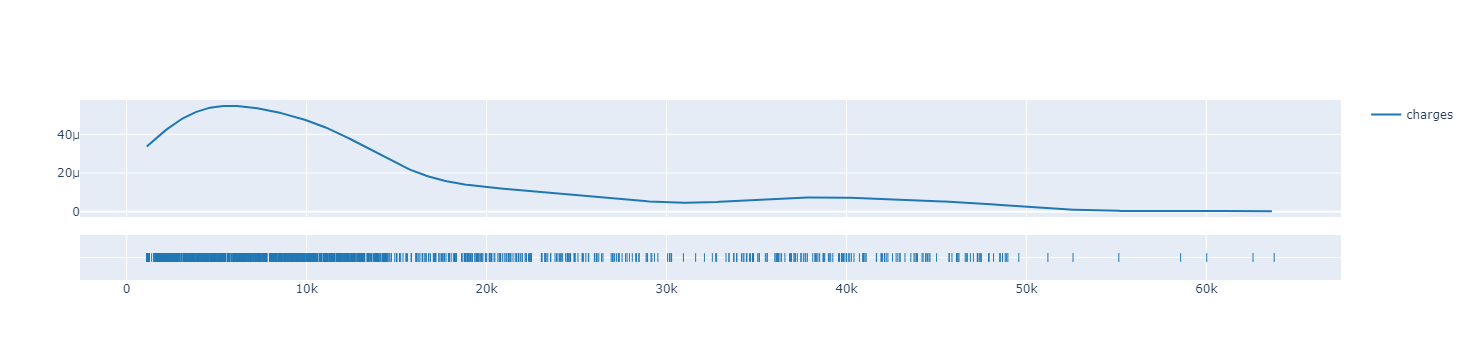

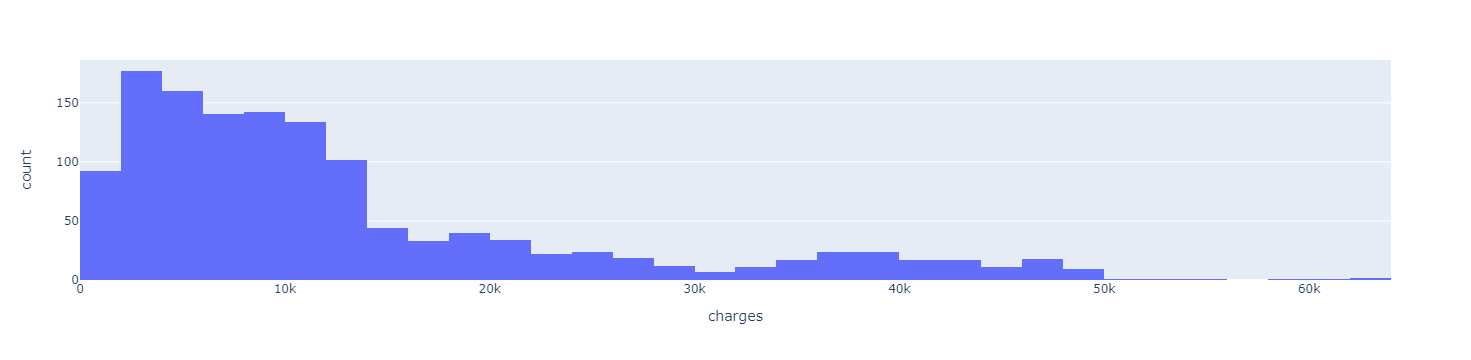

In [5]:
fig = ff.create_distplot([df['charges']], ['charges'], show_hist=False)
fig.show()

fig = px.histogram(df, x='charges')
fig.show()


shap = shapiro(df['charges'])
kolm = kstest(df['charges'], 'norm')

pvalue_shap = shap[1]
pvalue_kolm = kolm[1]

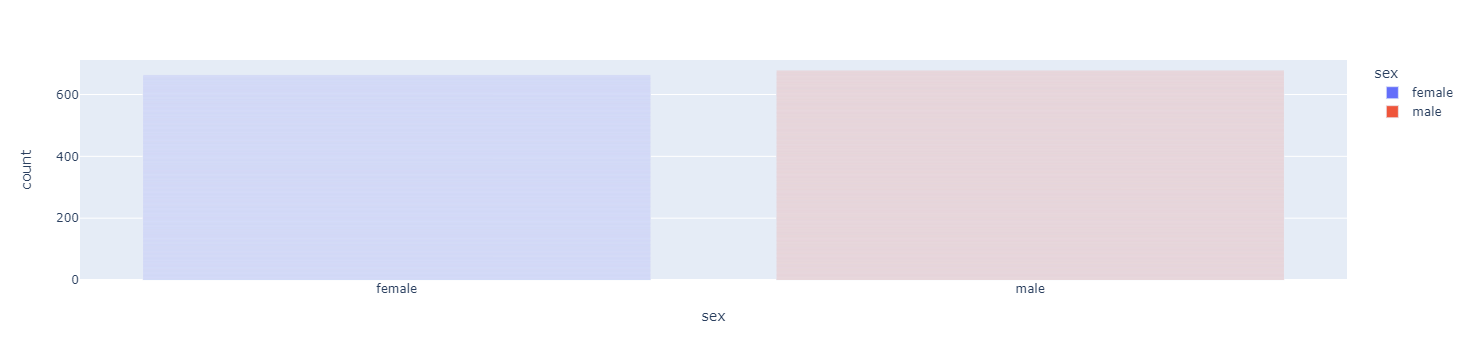

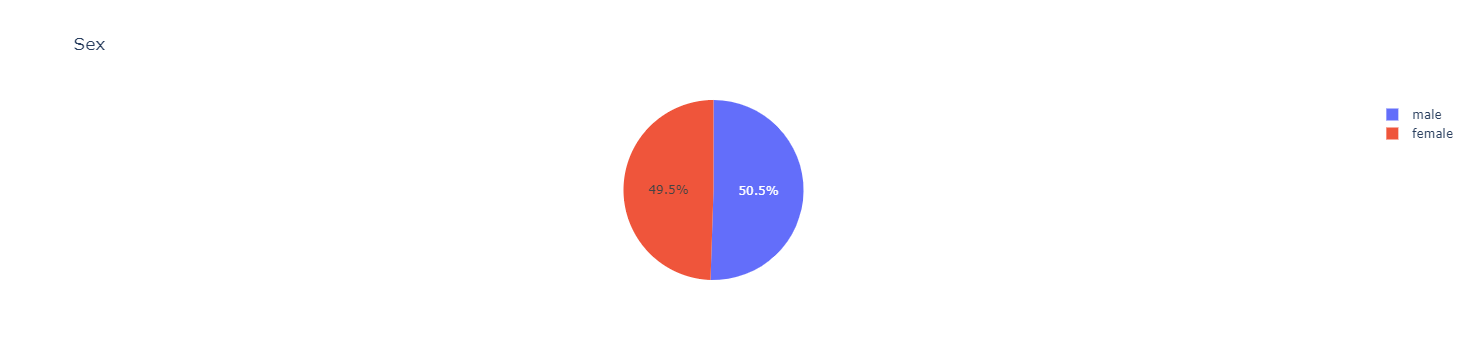

In [6]:
fig = px.bar(df, x='sex', color='sex')
fig.show()

fig = px.pie(df, names='sex', title='Sex')
fig.show()

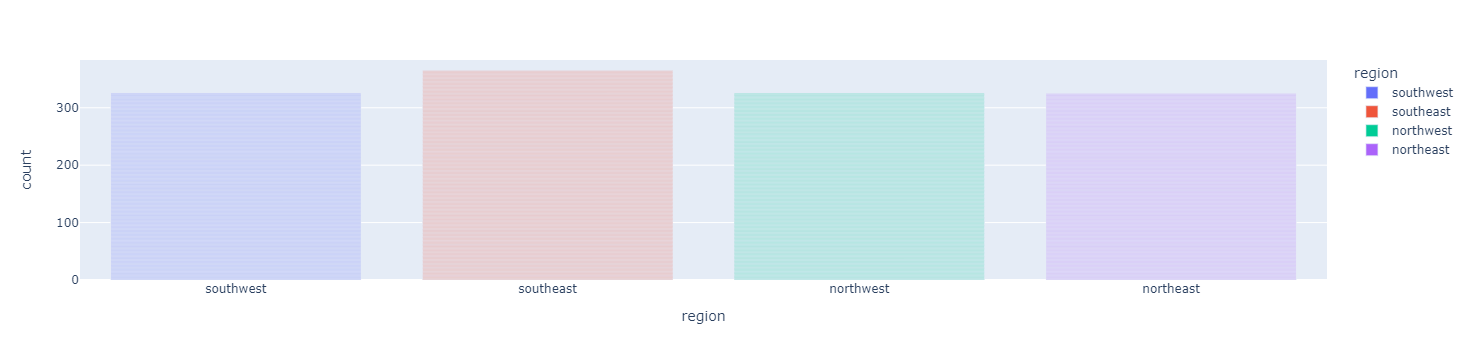

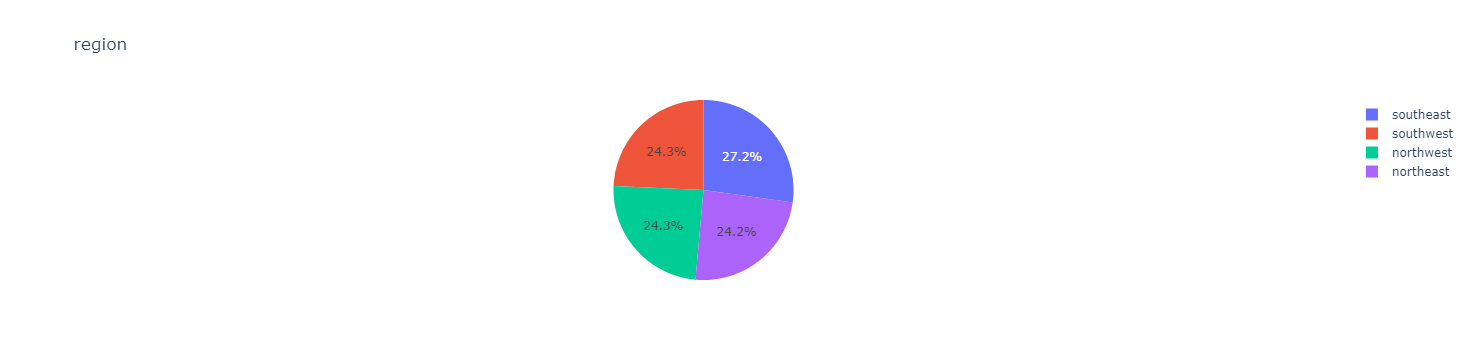

In [7]:
fig = px.bar(df, x='region', color='region')
fig.show()

fig = px.pie(df, names='region', title='region')
fig.show()

## Normalización de variables

lorem ipsu sum

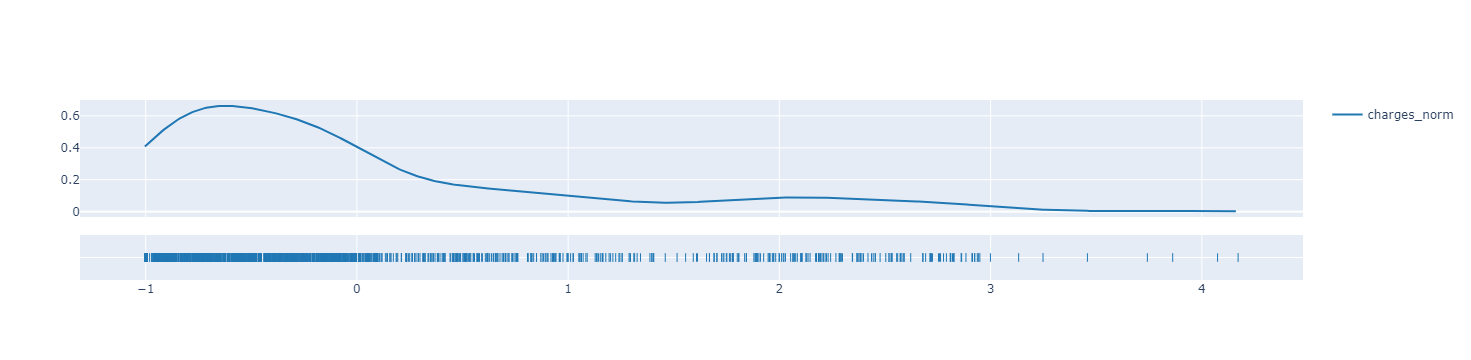

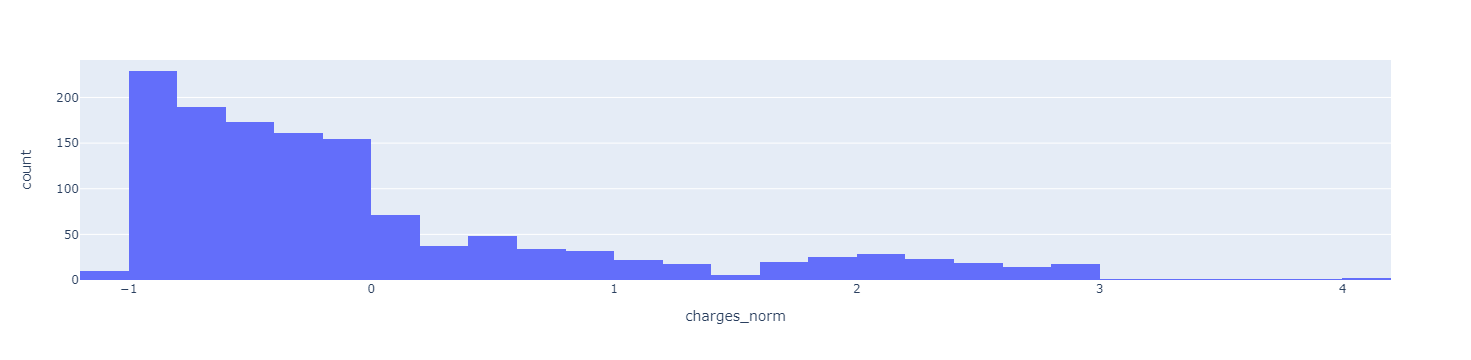

In [8]:
df['charges_norm'] = (df['charges'] - np.mean(df['charges'])) / np.std(df['charges'])

df.head()

fig = ff.create_distplot([df['charges_norm']], ['charges_norm'], show_hist=False)
fig.show()

fig = px.histogram(df, x='charges_norm')
fig.show()

## Transformación a numéricas

lorem ipsu sum

In [9]:
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['region']]).toarray())
print(encoder.categories_)
print(encoder.categories_[0][1:])
encoder_df.columns=encoder.categories_[0][1:]

encoder_df.head()
# #merge one-hot encoded columns back with original DataFrame
df = df.join(encoder_df)

df.head(25)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]
['northwest' 'southeast' 'southwest']


age     sex     bmi  children smoker     region      charges  \
0    19  female  27.900         0    yes  southwest  16884.92400   
1    18    male  33.770         1     no  southeast   1725.55230   
2    28    male  33.000         3     no  southeast   4449.46200   
3    33    male  22.705         0     no  northwest  21984.47061   
4    32    male  28.880         0     no  northwest   3866.85520   
5    31  female  25.740         0     no  southeast   3756.62160   
6    46  female  33.440         1     no  southeast   8240.58960   
7    37  female  27.740         3     no  northwest   7281.50560   
8    37    male  29.830         2     no  northeast   6406.41070   
9    60  female  25.840         0     no  northwest  28923.13692   
10   25    male  26.220         0     no  northeast   2721.32080   
11   62  female  26.290         0    yes  southeast  27808.72510   
12   23    male  34.400         0     no  southwest   1826.84300   
13   56  female  39.820         0     no  southeast  11090.71780   
14   27    male  42.130         0    yes  southeast  39611.75770   
15   19    male  24.600         1     no  southwest   1837.23700   
16   52  female  30.780         1     no  northeast  10797.33620   
17   23    male  23.845         0     no  northeast   2395.17155   
18   56    male  40.300         0     no  southwest  10602.38500   
19   30    male  35.300         0    yes  southwest  36837.46700   
20   60  female  36.005         0     no  northeast  13228.84695   
21   30  female  32.400         1     no  southwest   4149.73600   
22   18    male  34.100         0     no  southeast   1137.01100   
23   34  female  31.920         1    yes  northeast  37701.87680   
24   37    male  28.025         2     no  northwest   6203.90175   

    charges_norm  northwest  southeast  southwest  
0       0.298584        0.0        0.0        1.0  
1      -0.953689        0.0        1.0        0.0  
2      -0.728675        0.0        1.0        0.0  
3       0.719843        1.0        0.0        0.0  
4      -0.776802        1.0        0.0        0.0  
5      -0.785908        0.0        1.0        0.0  
6      -0.415500        0.0        1.0        0.0  
7      -0.494728        1.0        0.0        0.0  
8      -0.567017        0.0        0.0        0.0  
9       1.293027        1.0        0.0        0.0  
10     -0.871432        0.0        0.0        0.0  
11      1.200968        0.0        1.0        0.0  
12     -0.945322        0.0        0.0        1.0  
13     -0.180059        0.0        1.0        0.0  
14      2.175983        0.0        1.0        0.0  
15     -0.944463        0.0        0.0        1.0  
16     -0.204295        0.0        0.0        0.0  
17     -0.898374        0.0        0.0        0.0  
18     -0.220399        0.0        0.0        1.0  
19      1.946807        0.0        0.0        1.0  
20     -0.003434        0.0        0.0        0.0  
21     -0.753434        0.0        0.0        1.0  
22     -1.002307        0.0        1.0        0.0  
23      2.018214        0.0        0.0        0.0  
24     -0.583745        1.0        0.0        0.0

## Detección de anomalías

lorem ipsu sum

In [45]:
q1 = np.percentile(df['bmi'], q=25)
q3 = np.percentile(df['bmi'], q=75)
iqr = q3-q1
k=2
x1 = np.where(np.array(df['bmi']) < (q1-k * iqr), 1,0)
x2 = np.where(np.array(df['bmi']) > (q3 + k * iqr), 1,0)
x = x1 + x2
np.sum(x)
# q1-k * iqr
df['anom_bmi'] = x

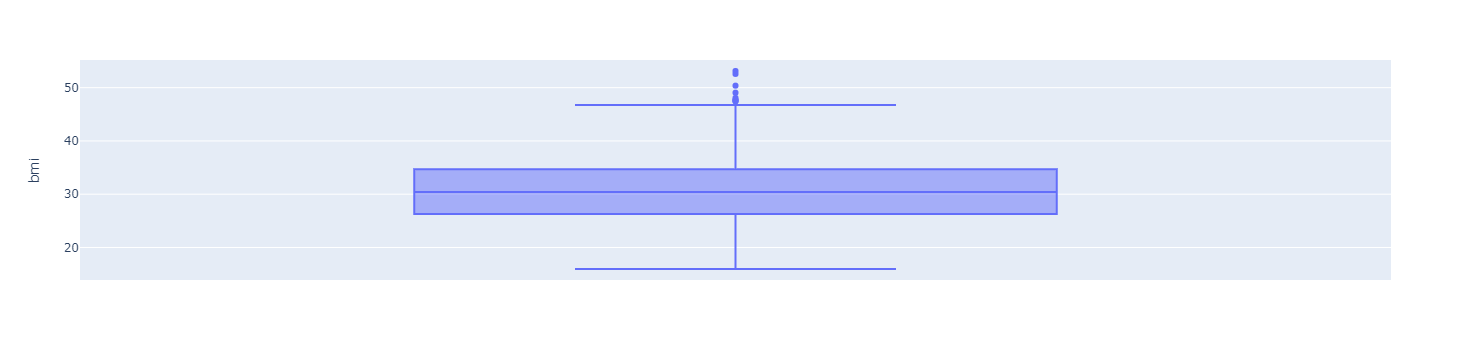

In [47]:
fig = px.box(df, y='bmi')
fig.show()

## Gráficos pareados

lorem ipsu sum

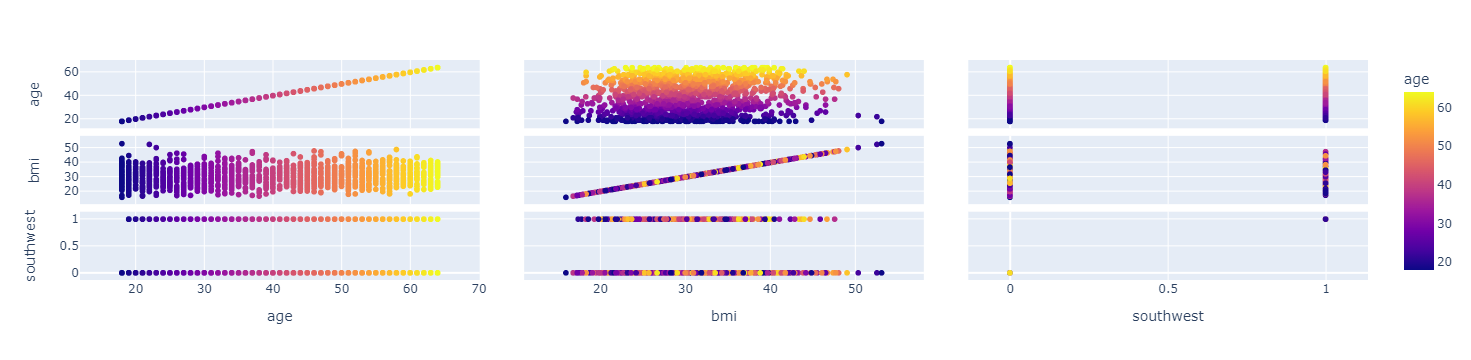

In [11]:
variables_num = ['age', 'bmi', 'southwest']
df = df[variables_num]

fig = px.scatter_matrix(df, color="age")
fig.show()



## Análisis de correlaciones

lorem ipsu sum

In [12]:
# TODO Quitar

corr = df.corr()
corr

age       bmi  southwest
age        1.000000  0.109272   0.010016
bmi        0.109272  1.000000  -0.006205
southwest  0.010016 -0.006205   1.000000

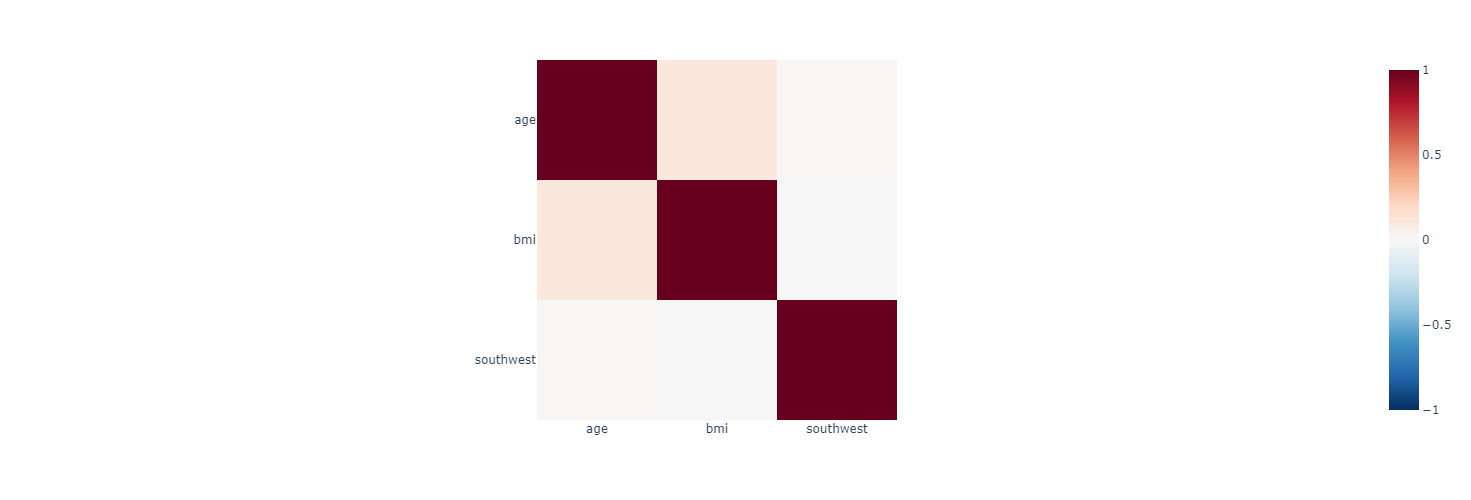

In [13]:
fig = px.imshow(corr, height=500, color_continuous_scale='RdBu_r', aspect='equal', color_continuous_midpoint=0)
fig.show()

## Reducción de dimensionalidad

lorem ipsu sum

<AxesSubplot:>

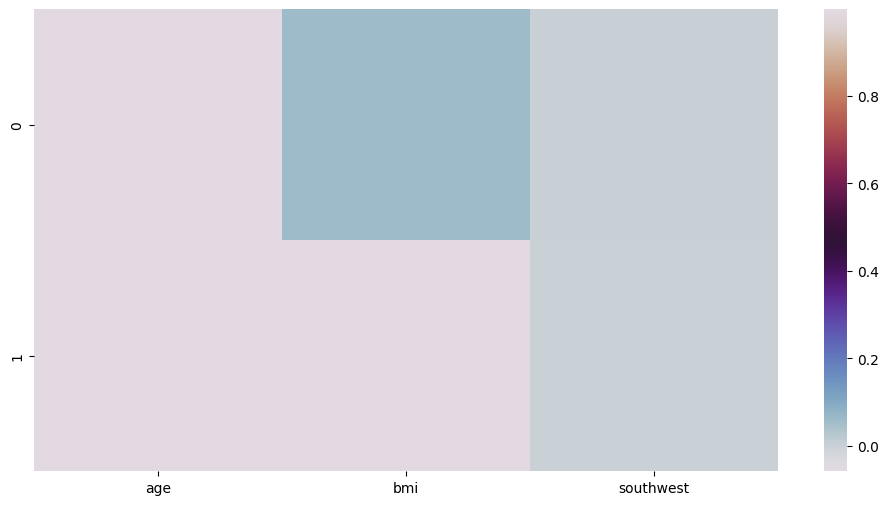

In [16]:

pca = PCA(n_components =2)
pca.fit(df)

df_pca = pca.transform(df) 
# df_pca.head()

pca.components_


map= pd.DataFrame(pca.components_,columns=df.columns)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

## Resumen final

lorem ipsu sum

In [112]:
df_end = df

df_end.describe()

age          bmi    southwest
count  1338.000000  1338.000000  1338.000000
mean     39.207025    30.663397     0.242900
std      14.049960     6.098187     0.428995
min      18.000000    15.960000     0.000000
25%      27.000000    26.296250     0.000000
50%      39.000000    30.400000     0.000000
75%      51.000000    34.693750     0.000000
max      64.000000    53.130000     1.000000